In [1]:
import requests
from bs4 import BeautifulSoup

### 연관 검색어 가져오기

In [2]:
query = "코로나"
url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={}".format(query)
print(url)

https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=코로나


In [3]:
response = requests.get(url)
response

<Response [200]>

In [4]:
dom = BeautifulSoup(response.content, "html.parser")

In [5]:
elements = dom.select("#nx_footer_related_keywords > div > div.related_srch > ul > li")
print(len(elements))

10


In [6]:
elements

[<li class="item"> <a class="keyword" href="?where=nexearch&amp;query=%EC%BD%94%EB%A1%9C%EB%82%98+2.5%EB%8B%A8%EA%B3%84+%EC%97%B0%EC%9E%A5&amp;ie=utf8&amp;sm=tab_she&amp;qdt=0" onclick="return goOtherCR(this, 'a=rsk_btm*q.list1&amp;r=1&amp;u=' + urlencode(this.href))"> <div class="tit">코로나 2.5단계 연장</div> </a> </li>,
 <li class="item"> <a class="keyword" href="?where=nexearch&amp;query=%EC%BD%94%EB%A1%9C%EB%82%98+%EB%9D%BC%EC%9D%B4%EB%B8%8C&amp;ie=utf8&amp;sm=tab_she&amp;qdt=0" onclick="return goOtherCR(this, 'a=rsk_btm*q.list1&amp;r=2&amp;u=' + urlencode(this.href))"> <div class="tit">코로나 라이브</div> </a> </li>,
 <li class="item"> <a class="keyword" href="?where=nexearch&amp;query=%EC%BD%94%EB%A1%9C%EB%82%98+3%EB%8B%A8%EA%B3%84&amp;ie=utf8&amp;sm=tab_she&amp;qdt=0" onclick="return goOtherCR(this, 'a=rsk_btm*q.list1&amp;r=3&amp;u=' + urlencode(this.href))"> <div class="tit">코로나 3단계</div> </a> </li>,
 <li class="item"> <a class="keyword" href="?where=nexearch&amp;query=%EC%BD%94%EB%A1%9C%E

In [7]:
keyword_list = [element.text.strip() for element in elements]
print(keyword_list)

['코로나 2.5단계 연장', '코로나 라이브', '코로나 3단계', '코로나 3단계 발표', '코로나 3단계 조치', '코로나 확진자', '코로나 백신', '코로나 집합금지', '코로나 단계', '코로나 2.5단계']


### 연관 검색어 크롤링을 함수화

In [8]:
def related_keywords_search(query):
    url = "https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query={}".format(query)
    response = requests.get(url)
    dom = BeautifulSoup(response.content, "html.parser")
    elements = dom.select("#nx_footer_related_keywords > div > div.related_srch > ul > li")
    keyword_list = [element.text.strip() for element in elements]
    return keyword_list

### 실시간 검색 순위 데이터 가져오기
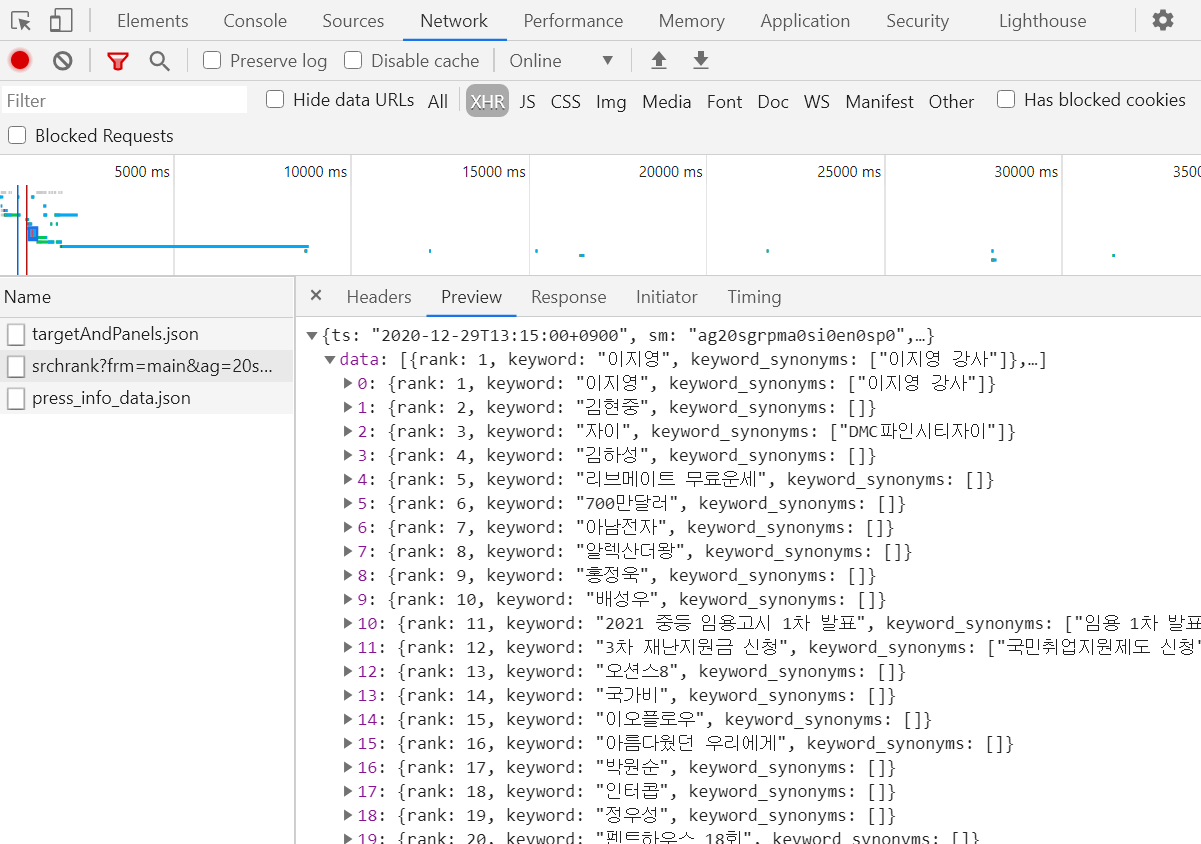
- url : https://www.naver.com/srchrank?frm=main 을 이용

In [9]:
url = "https://www.naver.com/srchrank?frm=main"
response = requests.get(url)
response.json()

{'ts': '2020-12-29T13:52:00+0900',
 'sm': 'agallgrpmamsi0en0sp0',
 'rop': [{'ag': 'all'},
  {'gr': '01'},
  {'ma': '-2'},
  {'si': '00'},
  {'en': '00'},
  {'sp': '00'}],
 'data': [{'rank': 1, 'keyword': '이지영 강사', 'keyword_synonyms': []},
  {'rank': 2, 'keyword': '이지영', 'keyword_synonyms': []},
  {'rank': 3, 'keyword': '아남전자', 'keyword_synonyms': []},
  {'rank': 4, 'keyword': '김하성', 'keyword_synonyms': []},
  {'rank': 5, 'keyword': '3차 재난지원금 신청', 'keyword_synonyms': ['3차 재난지원금 프리랜서']},
  {'rank': 6, 'keyword': '김현중', 'keyword_synonyms': []},
  {'rank': 7, 'keyword': '홍정욱', 'keyword_synonyms': []},
  {'rank': 8, 'keyword': '오션스8', 'keyword_synonyms': []},
  {'rank': 9, 'keyword': '700만달러', 'keyword_synonyms': []},
  {'rank': 10, 'keyword': '피네이션', 'keyword_synonyms': []},
  {'rank': 11, 'keyword': '여인의향기', 'keyword_synonyms': []},
  {'rank': 12, 'keyword': '펜트하우스 18회', 'keyword_synonyms': []},
  {'rank': 13, 'keyword': '빅죠', 'keyword_synonyms': []},
  {'rank': 14, 'keyword': '디아크', 'key

In [10]:
ranks = response.json().get("data")
ranks

[{'rank': 1, 'keyword': '이지영 강사', 'keyword_synonyms': []},
 {'rank': 2, 'keyword': '이지영', 'keyword_synonyms': []},
 {'rank': 3, 'keyword': '아남전자', 'keyword_synonyms': []},
 {'rank': 4, 'keyword': '김하성', 'keyword_synonyms': []},
 {'rank': 5, 'keyword': '3차 재난지원금 신청', 'keyword_synonyms': ['3차 재난지원금 프리랜서']},
 {'rank': 6, 'keyword': '김현중', 'keyword_synonyms': []},
 {'rank': 7, 'keyword': '홍정욱', 'keyword_synonyms': []},
 {'rank': 8, 'keyword': '오션스8', 'keyword_synonyms': []},
 {'rank': 9, 'keyword': '700만달러', 'keyword_synonyms': []},
 {'rank': 10, 'keyword': '피네이션', 'keyword_synonyms': []},
 {'rank': 11, 'keyword': '여인의향기', 'keyword_synonyms': []},
 {'rank': 12, 'keyword': '펜트하우스 18회', 'keyword_synonyms': []},
 {'rank': 13, 'keyword': '빅죠', 'keyword_synonyms': []},
 {'rank': 14, 'keyword': '디아크', 'keyword_synonyms': []},
 {'rank': 15, 'keyword': '한미사이언스', 'keyword_synonyms': []},
 {'rank': 16, 'keyword': 'knn', 'keyword_synonyms': []},
 {'rank': 17, 'keyword': '이순재', 'keyword_synonyms': []}

In [11]:
for rank in ranks:
    print(rank['keyword'])

이지영 강사
이지영
아남전자
김하성
3차 재난지원금 신청
김현중
홍정욱
오션스8
700만달러
피네이션
여인의향기
펜트하우스 18회
빅죠
디아크
한미사이언스
knn
이순재
배성우
싱어게인 결방
엄기준


### 실시간 검색어 크롤링 함수화

In [12]:
def get_rank_keywords():
    url = "https://www.naver.com/srchrank?frm=main"
    response = requests.get(url)
    ranks = response.json().get("data")
    keywords = []
    for rank in ranks:
        keywords.append(rank['keyword'])
    return keywords

In [13]:
get_rank_keywords()

['이지영 강사',
 '이지영',
 '아남전자',
 '김하성',
 '3차 재난지원금 신청',
 '김현중',
 '홍정욱',
 '오션스8',
 '700만달러',
 '피네이션',
 '여인의향기',
 '펜트하우스 18회',
 '빅죠',
 '디아크',
 '한미사이언스',
 'knn',
 '이순재',
 '배성우',
 '싱어게인 결방',
 '엄기준']

### 실시간 검색어의 연관 검색어를 출력

In [14]:
import pandas as pd

In [15]:
list = ["1" * 2]
print(list)

['11']


In [16]:
keywords = get_rank_keywords()

for i, keyword in enumerate(keywords):
    rank = i + 1
    related_keywords = related_keywords_search(keyword)
    print(str(rank),"위 검색어 : ", keyword)
    if not related_keywords:
        print("연관 검색어가 없습니다")
    else:
        print("연관 검색어 : ", related_keywords)
    print('')

1 위 검색어 :  이지영 강사
연관 검색어가 없습니다

2 위 검색어 :  이지영
연관 검색어가 없습니다

3 위 검색어 :  아남전자
연관 검색어 :  ['아남전자서비스센터', '아남', '아남tv', '아남전자주가', '하만', '아남반도체', '아남전자 tv', '아남전기', '아남전자 배당', '삼성전자']

4 위 검색어 :  김하성
연관 검색어가 없습니다

5 위 검색어 :  3차 재난지원금 신청
연관 검색어가 없습니다

6 위 검색어 :  김현중
연관 검색어가 없습니다

7 위 검색어 :  홍정욱
연관 검색어가 없습니다

8 위 검색어 :  오션스8
연관 검색어가 없습니다

9 위 검색어 :  700만달러
연관 검색어가 없습니다

10 위 검색어 :  피네이션
연관 검색어가 없습니다

11 위 검색어 :  여인의향기
연관 검색어가 없습니다

12 위 검색어 :  펜트하우스 18회
연관 검색어가 없습니다

13 위 검색어 :  빅죠
연관 검색어가 없습니다

14 위 검색어 :  디아크
연관 검색어가 없습니다

15 위 검색어 :  한미사이언스
연관 검색어가 없습니다

16 위 검색어 :  knn
연관 검색어가 없습니다

17 위 검색어 :  이순재
연관 검색어가 없습니다

18 위 검색어 :  배성우
연관 검색어가 없습니다

19 위 검색어 :  싱어게인 결방
연관 검색어가 없습니다

20 위 검색어 :  엄기준
연관 검색어가 없습니다

